In [145]:
# !wget https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip

In [146]:
# !unzip data.zip

In [147]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [148]:
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import load_img

import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.9.1'

In [149]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [150]:
model = models.Sequential()

# The shape for input should be (150, 150, 3)
input_shape = (150, 150, 3)

# create a convolutional layer (Conv2D), Use 32 filters, Kernel size should be (3, 3) (that's the size of the filter), se 'relu' as activation
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=input_shape))

# Reduce the size of the feature map with max pooling (MaxPooling2D) - Set the pooling size to (2, 2)
model.add(layers.MaxPooling2D((2, 2)))

# Turn the multi-dimensional result into vectors using a Flatten layer
model.add(layers.Flatten())

# Next, add a Dense layer with 64 neurons and 'relu' activation
model.add(layers.Dense(64, activation="relu"))

# Finally, create the Dense layer with 1 neuron - this will be the output - The output layer should have an activation - use the appropriate activation for the binary classification case
model.add(layers.Dense(1, activation="sigmoid"))

Q1: Since we have a binary classification problem, what is the best loss function for us?

A1: Binary cross entropy. Binary cross entropy (also known as logarithmic loss or log loss) is a model metric that tracks incorrect labeling of the data class by a model, penalizing the model if deviations in probability occur into classifying the labels. Low log loss values equate to high accuracy values. FROM: https://arize.com/blog-course/binary-cross-entropy-log-loss/

In [151]:
# As optimizer use SGD with the following parameters: SGD(lr=0.002, momentum=0.8)
model.compile(
    loss="binary_crossentropy",
    optimizer=optimizers.SGD(learning_rate=0.002, momentum=0.8),
    metrics=["acc"],
)

Q2: What's the number of parameters in the convolutional layer of our model? You can use the summary method for that.

In [152]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 175232)            0         
                                                                 
 dense_14 (Dense)            (None, 64)                11214912  
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
__________________________________________

A2: The convolutional layer has 896 parameters


In [153]:
train_dir = './data/train'
test_dir = './data/test'

In [154]:
# use the following data generator for both train and test sets:   ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [155]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    shuffle=True,
                                                    class_mode='binary')

Found 3677 images belonging to 2 classes.


In [156]:
validation_generator = val_datagen.flow_from_directory(test_dir,
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        shuffle=True,
                                                        class_mode='binary')

Found 918 images belonging to 2 classes.


In [157]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
184/184 [==============================] - 8s 43ms/step - loss: 0.6809 - acc: 0.5567 - val_loss: 0.6482 - val_acc: 0.5719
Epoch 2/10
184/184 [==============================] - 8s 44ms/step - loss: 0.6349 - acc: 0.6377 - val_loss: 0.5995 - val_acc: 0.6634
Epoch 3/10
184/184 [==============================] - 8s 43ms/step - loss: 0.5792 - acc: 0.6943 - val_loss: 0.5454 - val_acc: 0.7342
Epoch 4/10
184/184 [==============================] - 8s 44ms/step - loss: 0.5340 - acc: 0.7365 - val_loss: 0.5428 - val_acc: 0.7320
Epoch 5/10
184/184 [==============================] - 8s 43ms/step - loss: 0.5049 - acc: 0.7607 - val_loss: 0.5195 - val_acc: 0.7462
Epoch 6/10
184/184 [==============================] - 8s 44ms/step - loss: 0.4725 - acc: 0.7835 - val_loss: 0.5100 - val_acc: 0.7593
Epoch 7/10
184/184 [==============================] - 8s 43ms/step - loss: 0.4533 - acc: 0.7930 - val_loss: 0.5067 - val_acc: 0.7712
Epoch 8/10
184/184 [==============================] - 8s 44ms/step - 

Q3: What is the median of training accuracy for all the epochs for this model?

In [158]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

acc_median = np.median(acc)
acc_median

0.7720968127250671

A3: Median of training accuracy =0.77

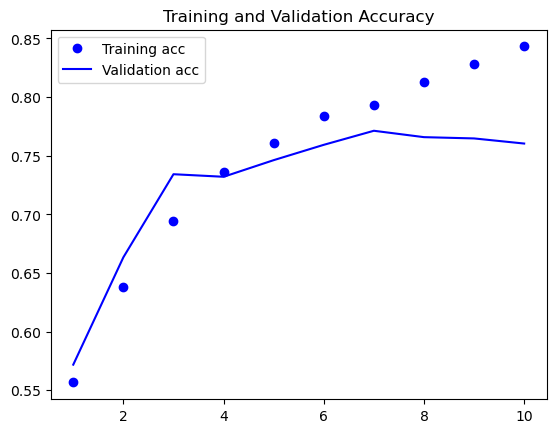

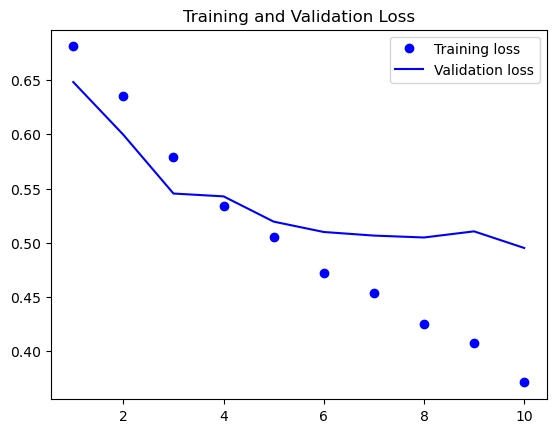

In [159]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

Q4: What is the standard deviation of training loss for all the epochs for this model?


In [160]:
loss_std = np.std(loss)
loss_std

0.09574311599567564

A4: 0.095


DATA AUGMENTATION

In [161]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')
     

In [162]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

Found 3677 images belonging to 2 classes.


In [163]:
test_datagen = ImageDataGenerator(rescale=1./255)


In [164]:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 918 images belonging to 2 classes.


In [165]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator)

Epoch 1/10
115/115 [==============================] - 22s 195ms/step - loss: 0.4911 - acc: 0.7718 - val_loss: 0.5122 - val_acc: 0.7603
Epoch 2/10
115/115 [==============================] - 22s 194ms/step - loss: 0.4773 - acc: 0.7754 - val_loss: 0.5034 - val_acc: 0.7658
Epoch 3/10
115/115 [==============================] - 23s 196ms/step - loss: 0.4580 - acc: 0.7919 - val_loss: 0.5109 - val_acc: 0.7603
Epoch 4/10
115/115 [==============================] - 22s 194ms/step - loss: 0.4655 - acc: 0.7868 - val_loss: 0.4742 - val_acc: 0.7843
Epoch 5/10
115/115 [==============================] - 23s 196ms/step - loss: 0.4663 - acc: 0.7805 - val_loss: 0.4653 - val_acc: 0.7854
Epoch 6/10
115/115 [==============================] - 22s 194ms/step - loss: 0.4655 - acc: 0.7900 - val_loss: 0.5092 - val_acc: 0.7538
Epoch 7/10
115/115 [==============================] - 23s 196ms/step - loss: 0.4613 - acc: 0.7906 - val_loss: 0.4856 - val_acc: 0.7702
Epoch 8/10
115/115 [==============================] - 2

Q5: What is the mean of test loss for all the epochs for the model trained with augmentations?

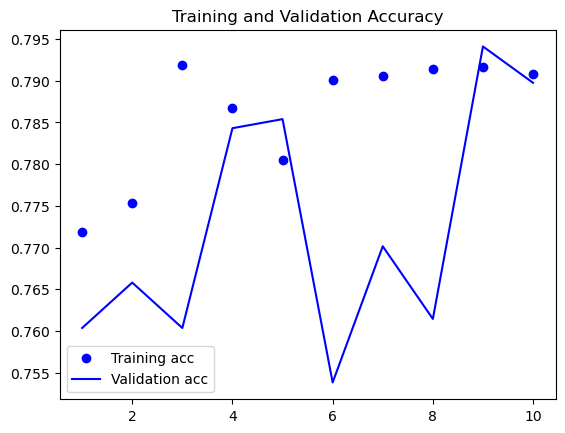

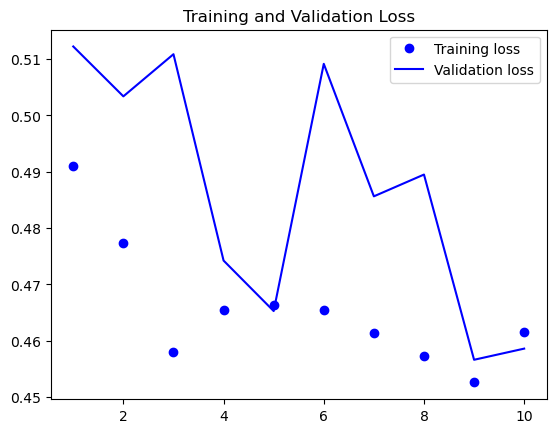

In [166]:
acc_aug = history.history['acc']
val_acc_aug = history.history['val_acc']
loss_aug = history.history['loss']
val_loss_aug = history.history['val_loss']

epochs_aug = range(1, len(acc) + 1)

plt.plot(epochs_aug, acc_aug, 'bo', label='Training acc')
plt.plot(epochs_aug, val_acc_aug, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_aug, loss_aug, 'bo', label='Training loss')
plt.plot(epochs_aug, val_loss_aug, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [167]:
loss_mean_aug = np.mean(val_loss_aug)
loss_mean_aug

0.4865608423948288

A5: The mean of validation loss is 0.48

Q6: What's the average of test accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?


In [168]:
acc_mean_aug = np.mean(val_acc_aug[5:10])
acc_mean_aug

0.7738561987876892

A6: The average of test accuracy is 0.77